# Bivariate Analysis
So far we've examined several ways to describe a single variable; how can we interpret the relationship between two variables?

Make sure to install the `seaborn` module in your terminal before running this worksheet!
`pip3 install seaborn` or `pip3 install --user seaborn`

In [2]:
# Initialization
import pandas as pd
import seaborn as sns
PENGUIN_PATH = "../datasets/penguins.csv"  # CHANGE THIS!

penguins = pd.read_csv(PENGUIN_PATH)
adelie_gentoo = penguins[penguins["species"] != "Chinstrap"]
gentoo = penguins[penguins["species"] == "Gentoo"]


## One Quantitative & One Categorical Variable
1. Examine the following **side-by-side violin plot.** Compare/contrast the bill lengths of _Gentoo_ penguins with those of _Adelie_ penguins. Use the vocabulary introduced in previous worksheets. What can you conclude about the relationship between species and bill length?

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

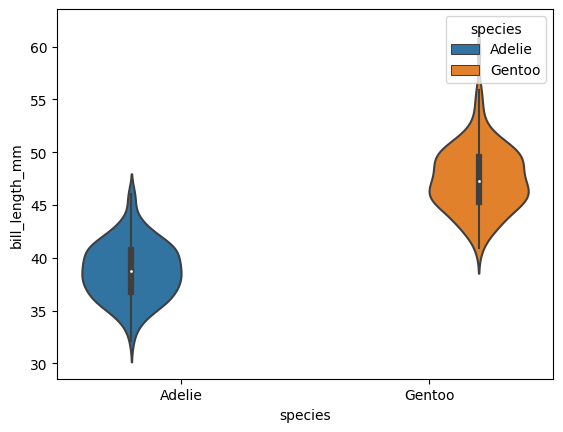

In [3]:
sns.violinplot(data=adelie_gentoo, y="bill_length_mm",
               x="species", hue="species")


## Two Categorical Variables

1. How can you statistically describe a single categorical variable?

frequency, categorical bar chart, mode, variety

2. You are helping to plan a bake sale. Since you're taking Art of Data, you're tasked with making a data-based decision about cookies. You send out a survey that asks two things: (1) What grade are you in? (2) Do you like cookies?
    1. Suppose that you've done prior research, and studies show that roughly 60% of all people like cookies. What % of your survey results do you expect to be "likes cookies"?
    2. You're interested in whether a student's grade has an effect on whether they like cookies. Suppose the _null hypothesis_ is true: that grade _does not_ affect cookie-liking. What % of 9th graders do you expect to like cookies? What about the other grades?
    3. Now suppost that the _alternative hypothesis_ is true: a student's grade _does_ affect cookie-liking. What patterns or differences do you expect to see in the % of students in each grade who like cookies?

1. 60%
2. 60%, 60%
3. Expect that grade correlates with percentage of people who like cookies, either an inverse or direct relationship

### Contingency Tables and Probability
Here are the survey results! This format is called a **contingency table**. The rows represent the values of one categorical variable, while the columns represent the values of another. Each **cell** contains the _frequency_ of observations that have _both_ properties.

|**Students**| Grade 9 | Grade 10 | Grade 11 | Grade 12 | **Total**|
|:--:|:--:|:--:|:--:|:--:|:--:|
| Likes cookies| 49 | 50 | 46 | 48 | 193 |
| Dislikes cookies | 29 | 29 | 36 | 32 | 126 |
|**Total**| 78 | 79 | 82 | 80 | 319 |

1. Based on the contingency table:
   1. What are the two categorical variables?
   2. How many students like cookies and are in 9th grade?
   3. How many students dislike cookies?
   4. How many students are there in total?

1. likes/dislikes cook, grade
2. 49
3. 126
4. 319

2. For a given sample, the **probability** of an **event** can be calculated as follows:  
   `P(event) = observations of interest / total numnber of observations`  
   E.g. the probability that a randomly selected student dislikes cookies is 126/319
    1. What is the probability that a randomly selected student is in 12th grade? (Denoted `P(12th grade)`)
    2. If a student in 11th grade is randomly selected, what is the probability that they dislike cookies? (denoted `P(dislike cookies | 11th grade)`)
    3. What is `P(likes cookies | 9th grade)`?

2.
    1. 80/319
    2. 36/82
    3. 49/78

### Conditional Proportions
We can continue to calculate probabilities for each cell. These probabilities are called **conditional proportions**, since they are _conditional_ on a certain variable (in this example, grade level). **n** denotes the sample size that was used to calculate the proportions.

|**Students**| Grade 9 | Grade 10 | Grade 11 | Grade 12 |
|:--:|:--:|:--:|:--:|:--:|
| Likes cookies| `49/78 = .628` | `.633` | `.561` | `0.605` |
| Dislikes cookies | `.372` | `0.367` | `.439` | `0.395` |
|**Total**| `1.00` | `1.00` | `1.00` | `1.00` |
|**n**| 78 | 79 | 82 | 80 |

1. Complete the table by replacing the `???`.

2. Based on the conditional proportions, do you like an **association** exists between a student'r grade and whether they like cookies? In other words, do the numbers support the _null hypothesis_ or the _alternative hypothesis_?

No, not enough info to decide for sure that connection between grade and likes/dislikes cookies.

3. (_Reflect_) How can we use contingency tables to analyze the relationship between two categorical variables?

compared side by side stuff

4. We can represent these tables using 2D lists / arrays / dictionaries. These are commonly reffered to as **matrices** (**matrix** singular). Write a function that takes in a contingency table, and returns a matrix of conditional proportions. The choice of data structure is up to you.

In [ ]:
def ConToCon(contingencyDict):
    conditionalDict = {}

    for x in contingencyDict["Total"]:
        conditionalDict["n"][x] = contingencyDict["Total"][x]

    for x in contingencyDict:
        for z in x:
            conditionalDict["n"][] 


## Two Quantitative Variables

1. Why are contingency tables not a good tool for analyzing the relationship between two _quantitative_ variables?

2. Shown below is a **scatterplot** that tracks the bill lengths and depths of Gento penguins. Each **point** on the plot represents one observation. What do you notice?

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

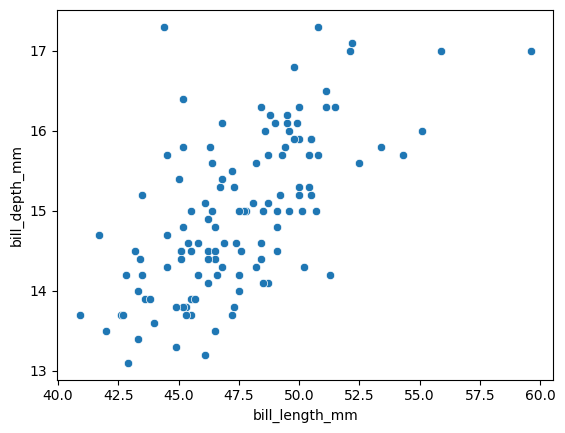

In [4]:
sns.scatterplot(data=gentoo, x="bill_length_mm", y="bill_depth_mm")


upwards trend

3. By using colors, we can show how the relationship between two quantiative variables differs between categories. For example, the scatterplot below plots bill lengths and depths for all three species. What do you notice?

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

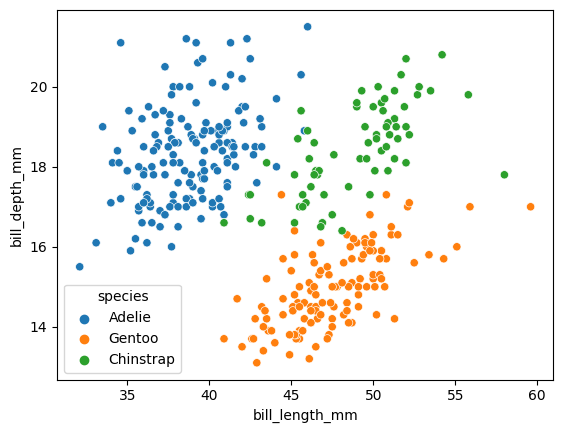

In [16]:
sns.scatterplot(data=penguins, x="bill_length_mm",
                y="bill_depth_mm", hue="species")


bill length compared to bill depth depends on species

## Anscombe's Quartet
![Ancsombe's quartet](img/anscombe.png)

| **Property** | **Value**|
|:--|:-:|
| Mean of x| 9 |
| Sample variance of x | 11 |
| Mean of y | 7.50 |
| Sample variance of y | 4.125 |
| Correlation between x and y | 0.816|
| Linear regression line | y = 0.500x + 3.00 |

1. Pictured above is a set of scatterplots called **Anscombe's Quartet.** The summary statistics for each dataset are almost exactly the same. What do the scatterplots show that the numbers don't?